# Main

In [1]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os


In [2]:
# Leemos el archivo
myFolder = (os.getcwd()) # busca en el directorio actual

#Acá paso los datos a una lista de strings y recorro todos
#L=['4','16','32','64','128'];
L=['4','16'];


#-----cosas para graficar: 
#----A determinar Pc(inf), nu y tau
#Pc vs L ╬
#Pc vs dispersión
#Determinar nu (franco lo hace con log(Pc(L)-Pc(inf))) vs log L
#F(p) vs p
            
#----B determinar D (dimensión fractal)
#log(ns) vs log(s)
#chi^2 vs p

#----C obtener beta a partir de la P(inf)
#log M vs log L, donde M es la masa
#Pinf(p) vs (p-pc)
#log(Pinf(p)) vs log (p-pc)


# Ejercicio 1.

In [95]:
pc_mean = [];
pc_std = [];
pc_L =[]; 
#quiero promediar mis pc para cada L
for i,l in enumerate(L):
#l='4'
    with open ('datos_p_L='+l+'.txt', 'r') as mf: 
        myfile=mf.read()
        datos = [float(i) for i in myfile.split(' ')[:-3] if i.strip()];
        pc_mean= np.mean(datos);
        pc_std=np.std(datos);
        ls=[int(l), pc_mean, pc_std];
        
    pc_L.append(ls)
    mf.close()


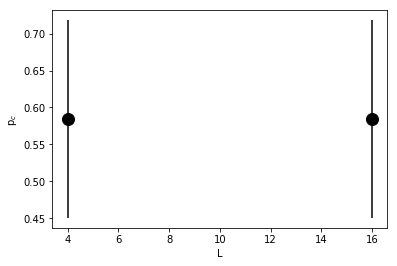

In [96]:
#grafiquemos
name='pcvsL'
plt.figure()
for i in range(0,len(pc_L)):
    plt.plot(pc_L[i][0],pc_L[i][1],'ko', markersize=12)
    plt.errorbar(pc_L[i][0],pc_L[i][1],pc_L[i][2],ecolor='k')
    
plt.xlabel('L')
plt.ylabel('p$_{{c}}$')
#plt.legend()
#plt.title(name)

plt.savefig(name+'_grafico.png')
plt.show()


# Ejercicio 2.

In [133]:
probabilidad_L = [];
fz_percolante_L =[];
percola_L = [];
ns_L = [];
prob_total =[]; #esto sería una lista de listas donde cada elemento es el archivo
fz_perc_total =[];
ns_total = [];

#l='4';
for j,l in enumerate(L):
    print(l)
    with open ('Tablas_L='+l+'.txt', 'r') as myfile: 
        for myline in myfile: # For each line, stored as myline,
            datos = [i for i in myline.split(' ') if i.strip()];
            #print(datos)
            largo=len(datos);           #tomo la primera, pero todas tienen misma cantidad de elementos

            if largo > 1: #esto lo hice para evitar las filas de los 'x00'
                probabilidad_L.append(datos[0]);

                if (str(datos[1]) != 'nan'):
                    fz_percolante_L.append(float(datos[1])); #aca hay que tener cuidado con la probabilidad percolante, xq aparece NaN         

                for j in range(2,largo):    #para el resto de los elementos que son los ns
                    ns_L.append(float(datos[0]));
                    ns_L.append(float(datos[j]));                 

    prob_total.append(probabilidad_L)
    fz_perc_total.append(fz_percolante_L);
    ns_total.append(ns_L);
    myfile.close()

print(prob_total)
print(fz_perc_total)
print(ns_total)


4
16
[['0.000000', '0.010000', '0.020000', '0.030000', '0.040000', '0.050000', '0.060000', '0.070000', '0.080000', '0.090000', '0.100000', '0.110000', '0.120000', '0.130000', '0.140000', '0.150000', '0.160000', '0.170000', '0.180000', '0.190000', '0.200000', '0.210000', '0.220000', '0.230000', '0.240000', '0.250000', '0.260000', '0.270000', '0.280000', '0.290000', '0.300000', '0.310000', '0.320000', '0.330000', '0.340000', '0.350000', '0.360000', '0.370000', '0.380000', '0.390000', '0.400000', '0.410000', '0.420000', '0.430000', '0.440000', '0.450000', '0.460000', '0.470000', '0.480000', '0.490000', '0.500000', '0.510000', '0.520000', '0.530000', '0.540000', '0.550000', '0.560000', '0.570000', '0.580000', '0.590000', '0.600000', '0.610000', '0.620000', '0.630000', '0.640000', '0.650000', '0.660000', '0.670000', '0.680000', '0.690000', '0.700000', '0.710000', '0.720000', '0.730000', '0.740000', '0.750000', '0.760000', '0.770000', '0.780000', '0.790000', '0.800000', '0.810000', '0.820000

In [134]:
print(len(prob_total))
print(len(fz_perc_total))
print(len(ns_total))

2
2
2
